In [12]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("qvalue")

In [13]:
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(qvalue)

In [44]:
# dynamic effects
dynamic_file = "/share/ScratchGeneral/anncuo/OneK1K/dyn_eqtl_linear-sq_data.RDS"

In [47]:
dt = readRDS(dynamic_file)
head(dt,2)
length(unique(dt[dt$fdr_sq<0.05,]$id))

GeneID snpid        
1 PPA1   10:71963608_A
2 GDI2   10:5855403_C 
  anova                                                                                                                                                                                    
1 15.000000, 16.000000, -7871.558581, -7870.257037, -7771.993991, -7764.054808, 3950.779291, 3951.128519, -7901.558581, -7902.257037, NA, 0.698456, NA, 1.000000, NA, 0.403303             
2 15.0000000, 16.0000000, -5414.1029960, -5413.4603514, -5314.5384059, -5307.2581219, 2722.0514980, 2722.7301757, -5444.1029960, -5445.4603514, NA, 1.3573554, NA, 1.0000000, NA, 0.2439963
  p.value   fdr      
1 0.4033030 0.7946625
2 0.2439963 0.6506389
  anova_sq                                                                                                                                                                                 
1 16.0000000, 18.0000000, -8275.2382811, -8272.0825183, -8169.0360516, -8152.6050101, 4153.6191406, 4154.0412591, -8307.2382811, -8308.0825183, NA, 0.8442371, NA, 2.0000000, NA, 0.6556563
2 16.0000000, 18.0000000, -5869.3416840, -5867.0102079, -5763.1394545, -5747.5326997, 2950.6708420, 2951.5051039, -5901.3416840, -5903.0102079, NA, 1.6685239, NA, 2.0000000, NA, 0.4341948
  p.value_sq fdr_sq    id                 singular singular_sq
1 0.6556563  1.0000000 10:71963608_A-PPA1 FALSE    FALSE      
2 0.4341948  0.8882569 10:5855403_C-GDI2  FALSE    FALSE

[1] 303

In [52]:
dt[dt$fdr_sq<0.05,]

GeneID   snpid         
1   TIMM10   11:57283988_T 
2   C11orf24 11:68066034_A 
3   UCP2     11:73699136_G 
4   FAM111A  11:58930836_A 
5   CORO1B   11:67215988_G 
6   SDHAF2   11:61514670_C 
7   RPS26    12:56401085_A 
8   CLEC2D   12:9833628_T  
9   LTA4H    12:96427293_T 
10  TAPBPL   12:6567787_C  
11  IRAK3    12:66580877_G 
12  CD9      12:6307566_T  
13  TMEM120B 12:122213144_C
14  APOLD1   12:12460803_C 
15  DYRK2    12:68435316_C 
16  RNASE6   14:21178387_G 
17  TCL1A    14:96136775_A 
18  TCL1B    14:96141418_A 
19  DHRS4    14:24478799_T 
20  SLC25A29 14:100769163_T
21  CIB1     15:90823039_G 
22  NME4     16:447561_T   
23  DBNDD1   16:90074001_T 
24  IL4R     16:27277056_A 
25  EIF5A    17:7207964_C  
26  ORMDL3   17:38051348_G 
27  SCIMP    17:5133128_C  
28  ADPRM    17:10619583_A 
29  CCL4     17:34431403_A 
30  SCPEP1   17:55042835_C 
⋮   ⋮        ⋮             
274 ANXA4    2:69958944_C  
275 CAPG     2:85654526_G  
276 RPL14    3:40533061_T  
277 RASSF6   4:74344535_A  
278 GPM6A    4:176961371_A 
279 CENPK    5:65053753_G  
280 DSP      6:7434286_T   
281 NQO2     6:3027532_A   
282 TOMM7    7:22885975_C  
283 CNTNAP2  7:147999811_T 
284 ASCL2    11:2321650_G  
285 LILRB2   19:54992748_T 
286 PNRC2    1:24375663_A  
287 RGS16    1:182601205_C 
288 SULF2    20:46134921_C 
289 LARGE    22:33619971_T 
290 MYO7B    2:128389343_T 
291 DSP      6:7435888_C   
292 HSPA1B   6:31576714_A  
293 NCR3     6:31367874_C  
294 ASCL2    11:2321284_A  
295 PNRC2    1:24364531_A  
296 MYO7B    2:128389624_A 
297 DSP      6:7434045_A   
298 HSPA1B   6:31601520_C  
299 ZP3      7:76178517_C  
300 MYO7B    2:128385224_G 
301 DSP      6:7436104_C   
302 HSPA1B   6:31602489_C  
303 ZP3      7:76184774_A  
    anova                                                                                                                                                                                                 
1   1.500000e+01, 1.600000e+01, -1.046512e+04, -1.046611e+04, -1.036555e+04, -1.035991e+04, 5.247559e+03, 5.249054e+03, -1.049512e+04, -1.049811e+04, NA, 2.989917e+00, NA, 1.000000e+00, NA, 8.378448e-02
2   1.500000e+01, 1.600000e+01, -1.552279e+04, -1.552174e+04, -1.542323e+04, -1.541553e+04, 7.776397e+03, 7.776868e+03, -1.555279e+04, -1.555374e+04, NA, 9.415168e-01, NA, 1.000000e+00, NA, 3.318881e-01
3   15.0000000, 16.0000000, -1280.9354761, -1280.7422580, -1181.3708860, -1174.5400285, 655.4677381, 656.3711290, -1310.9354761, -1312.7422580, NA, 1.8067819, NA, 1.0000000, NA, 0.1788948               
4   1.500000e+01, 1.600000e+01, -1.461393e+04, -1.461200e+04, -1.451436e+04, -1.450580e+04, 7.321965e+03, 7.322001e+03, -1.464393e+04, -1.464400e+04, NA, 7.373129e-02, NA, 1.000000e+00, NA, 7.859795e-01
5   1.500000e+01, 1.600000e+01, -1.084853e+04, -1.090856e+04, -1.074896e+04, -1.080235e+04, 5.439263e+03, 5.470278e+03, -1.087853e+04, -1.094056e+04, NA, 6.202924e+01, NA, 1.000000e+00, NA, 3.383944e-15
6   1.500000e+01, 1.600000e+01, -1.306290e+04, -1.307103e+04, -1.296333e+04, -1.296483e+04, 6.546448e+03, 6.551517e+03, -1.309290e+04, -1.310303e+04, NA, 1.013744e+01, NA, 1.000000e+00, NA, 1.452881e-03
7   1.500000e+01, 1.600000e+01, -1.657116e+03, -1.707491e+03, -1.557551e+03, -1.601289e+03, 8.435578e+02, 8.697457e+02, -1.687116e+03, -1.739491e+03, NA, 5.237584e+01, NA, 1.000000e+00, NA, 4.583290e-13
8   1.500000e+01, 1.600000e+01, -9.913415e+03, -9.923634e+03, -9.813850e+03, -9.817431e+03, 4.971707e+03, 4.977817e+03, -9.943415e+03, -9.955634e+03, NA, 1.221913e+01, NA, 1.000000e+00, NA, 4.730199e-04
9   1.500000e+01, 1.600000e+01, -6.979509e+03, -6.984160e+03, -6.879944e+03, -6.877957e+03, 3.504754e+03, 3.508080e+03, -7.009509e+03, -7.016160e+03, NA, 6.650745e+00, NA, 1.000000e+00, NA, 9.911436e-03
10  1.500000e+01, 1.600000e+01, -1.531961e+04, -1.532494e+04, -1.522004e+04, -1.521874e+04, 7.674805e+03, 7.678471e+03, -1.534961e+04, -1.535694e+04, NA, 7.332602e+00, NA, 1.000000e+00, NA, 6.771495e-03
11  1.500000e+01, 1.600000e+01, -2.

In [7]:
# dynamic effects
pseudotime_file = "/share/ScratchGeneral/anncuo/OneK1K/slingshot_pseudotime.RDS"

In [8]:
pt = readRDS(pseudotime_file)
head(pt,2)

barcode            cell_type individual pool   latent SCT_snn_res.0.1
1 AAACCTGCAACGATCT-1 B IN      686_687    pool_1 b1     0              
2 AAACCTGGTCAGAATA-1 B Mem     692_693    pool_1 b1     1              
  pseudotime Q4 Q5 Q6
1 0.09410877 Q2 Q2 Q2
2 0.11409837 Q4 Q5 Q6

In [20]:
sceb = "/share/ScratchGeneral/anncuo/OneK1K/b_cells_phate_slingshot.RDS"
sceb = readRDS(sceb)

In [24]:
sceb

Loading required package: SeuratObject


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays


Loading required package: Seurat


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




An object of class Seurat 
65476 features across 124968 samples within 2 assays 
Active assay: SCT (32738 features, 500 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, phate

In [25]:
phate_df = as.data.frame(Embeddings(sceb, reduction = "phate"))
head(phate_df)

PHATE_1      PHATE_2     
AAACCTGCAACGATCT-1 -0.017837966  0.008218786
AAACCTGGTCAGAATA-1  0.005425100 -0.011797981
AAACGGGAGCGTCAAG-1 -0.008225682 -0.010292767
AAACGGGAGGGAACGG-1  0.022618397  0.013384085
AAACGGGCAGTTCATG-1 -0.015532247  0.010371727
AAACGGGGTCCCTACT-1 -0.010241127  0.009503963

In [26]:
df_to_plot = cbind(phate_df,pt)
head(df_to_plot)

PHATE_1      PHATE_2      barcode            cell_type
AAACCTGCAACGATCT-1 -0.017837966  0.008218786 AAACCTGCAACGATCT-1 B IN     
AAACCTGGTCAGAATA-1  0.005425100 -0.011797981 AAACCTGGTCAGAATA-1 B Mem    
AAACGGGAGCGTCAAG-1 -0.008225682 -0.010292767 AAACGGGAGCGTCAAG-1 B Mem    
AAACGGGAGGGAACGG-1  0.022618397  0.013384085 AAACGGGAGGGAACGG-1 B IN     
AAACGGGCAGTTCATG-1 -0.015532247  0.010371727 AAACGGGCAGTTCATG-1 B IN     
AAACGGGGTCCCTACT-1 -0.010241127  0.009503963 AAACGGGGTCCCTACT-1 B IN     
                   individual pool   latent SCT_snn_res.0.1 pseudotime Q4 Q5 Q6
AAACCTGCAACGATCT-1 686_687    pool_1 b1     0               0.09410877 Q2 Q2 Q2
AAACCTGGTCAGAATA-1 692_693    pool_1 b1     1               0.11409837 Q4 Q5 Q6
AAACGGGAGCGTCAAG-1 692_693    pool_1 b1     1               0.10314252 Q3 Q4 Q5
AAACGGGAGGGAACGG-1 690_691    pool_1 b1     2               0.06232271 Q1 Q1 Q1
AAACGGGCAGTTCATG-1 682_683    pool_1 b1     0               0.09238329 Q1 Q2 Q2
AAACGGGGTCCCTACT-1 692_693    pool_1 b1     0               0.09061180 Q1 Q1 Q1

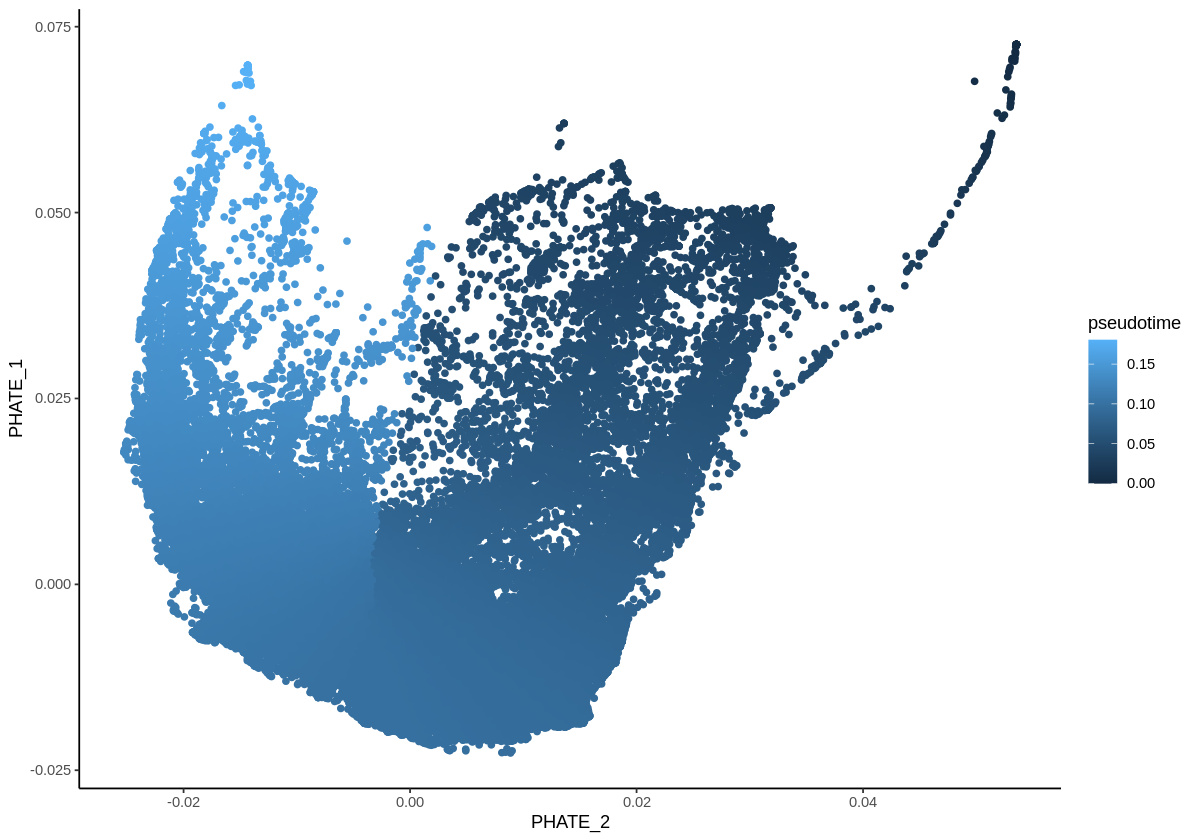

In [74]:
options(repr.plot.width = 10, repr.plot.height = 7)
ggplot(df_to_plot, aes(x = PHATE_2, y = PHATE_1, colour = pseudotime)) + geom_point() + theme_classic()

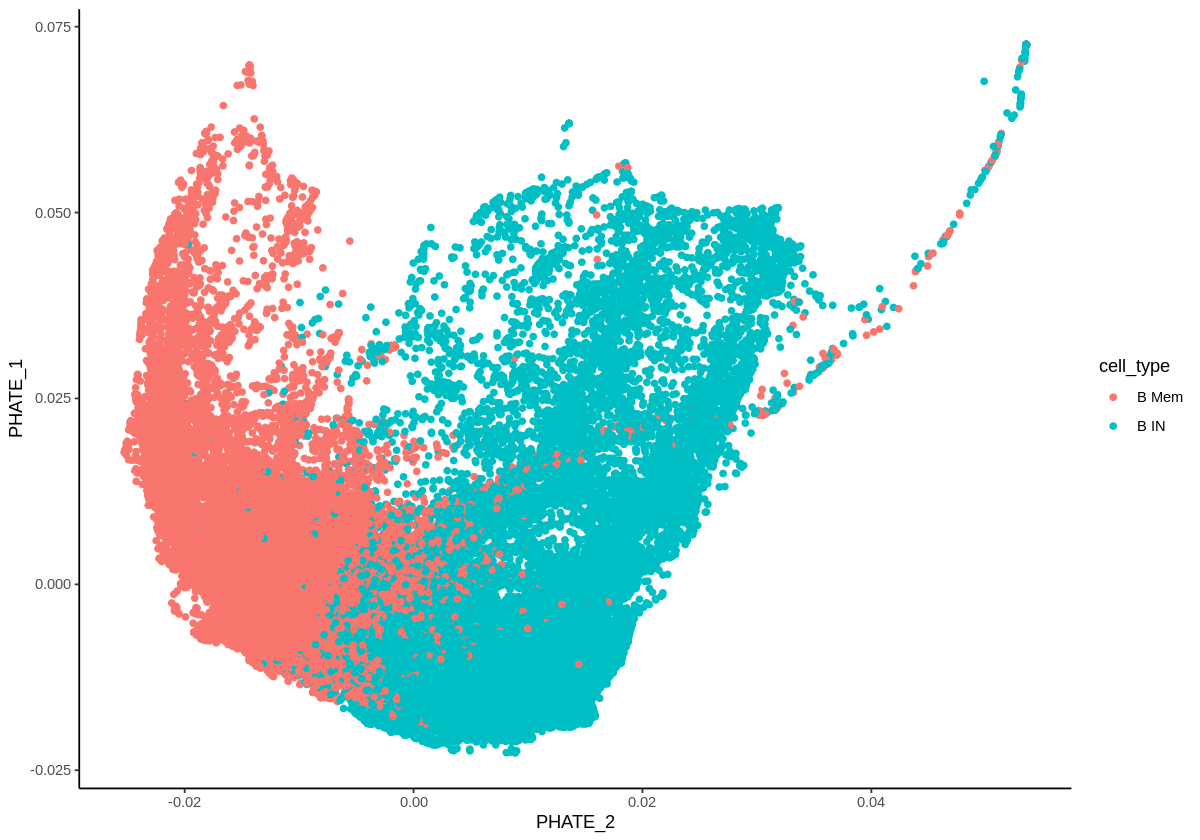

In [75]:
options(repr.plot.width = 10, repr.plot.height = 7)
ggplot(df_to_plot, aes(x = PHATE_2, y = PHATE_1, colour = cell_type)) + geom_point() + theme_classic()

In [39]:
df_colours = read.csv(paste0(mydir,"celltype_colours.csv"), row.names=1)
df_colours

cell_type               colours
1  CD4+ KLRB1- T cell      #882E72
2  CD4+ KLRB1+ T cell      #B178A6
3  CD4+ SOX4+ T cell       #D6C1DE
4  CD8+ GNLY+ NKG7+ T cell #1965B0
5  CD8+ LTB+ T cell        #5289C7
6  CD8+ S100B+ T cell      #7BAFDE
7  XCL1- NK                #4EB265
8  XCL1+ NK                #90C987
9  IgJ+ B cell             #CAE0AB
10 TCL1A- FCER2- B cell    #F7EE55
11 TCL1A+ FCER2+ B cell    #F6C141
12 Monocyte CD14+          #F1932D
13 Monocyte FCGR3A+        #E8601C
14 Dendritic cell          #DC050C

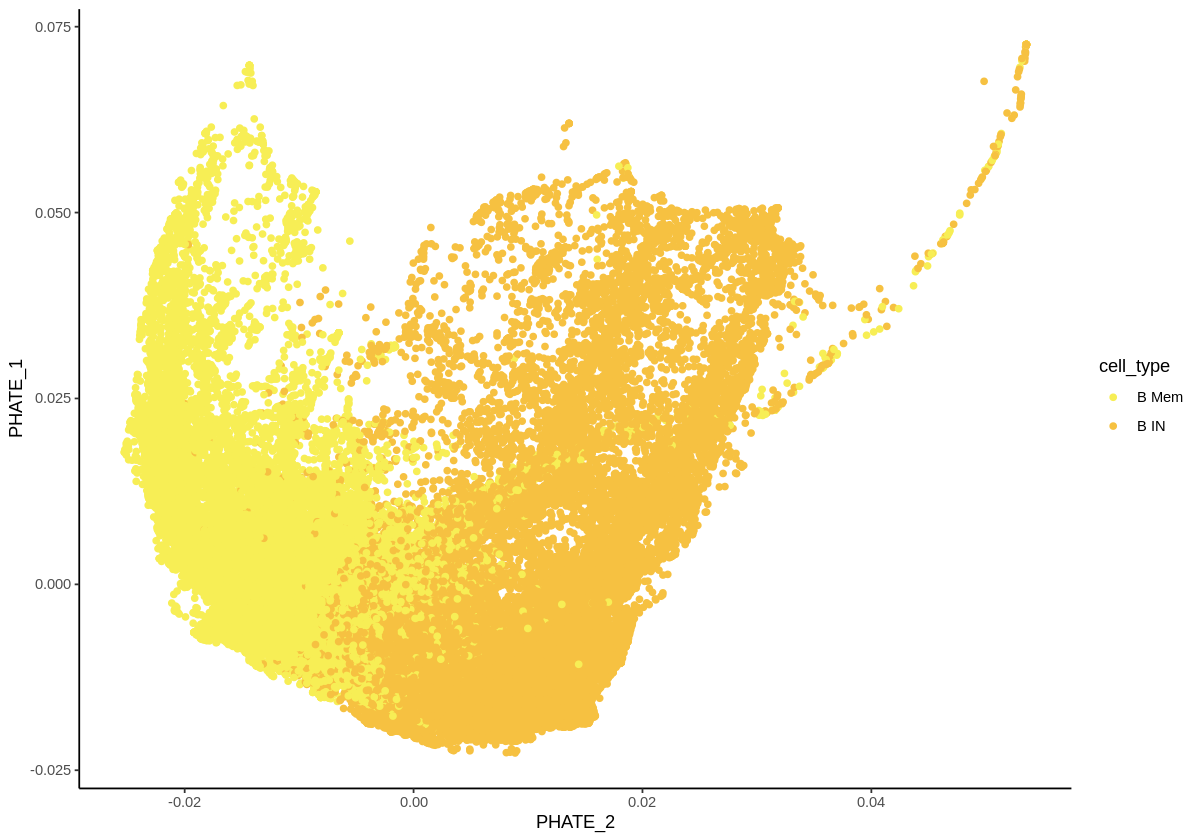

In [40]:
options(repr.plot.width = 10, repr.plot.height = 7)
p = ggplot(df_to_plot, aes(x = PHATE_2, y = PHATE_1, colour = cell_type)) + geom_point() + theme_classic()
p + scale_colour_manual(values = df_colours[grep("TCL1A",df_colours$cell_type),]$colours)

In [27]:
file1 = "/share/ScratchGeneral/anncuo/OneK1K/CRM_interaction/Bcells_Bcell_eQTLs/betas/SELL_betaG.csv"
df1 = read.csv(file1, row.names=1)
df1$cell = rownames(df1)
head(df1,2)

X11.57283988 cell              
AAACCTGCAACGATCT-1 0.06037347   AAACCTGCAACGATCT-1
AAACCTGGTCAGAATA-1 0.06961878   AAACCTGGTCAGAATA-1

In [31]:
df_to_plot$cell = rownames(df_to_plot)
df_to_plot2 = inner_join(df_to_plot, df1)

Joining, by = "cell"


In [32]:
## with plasma

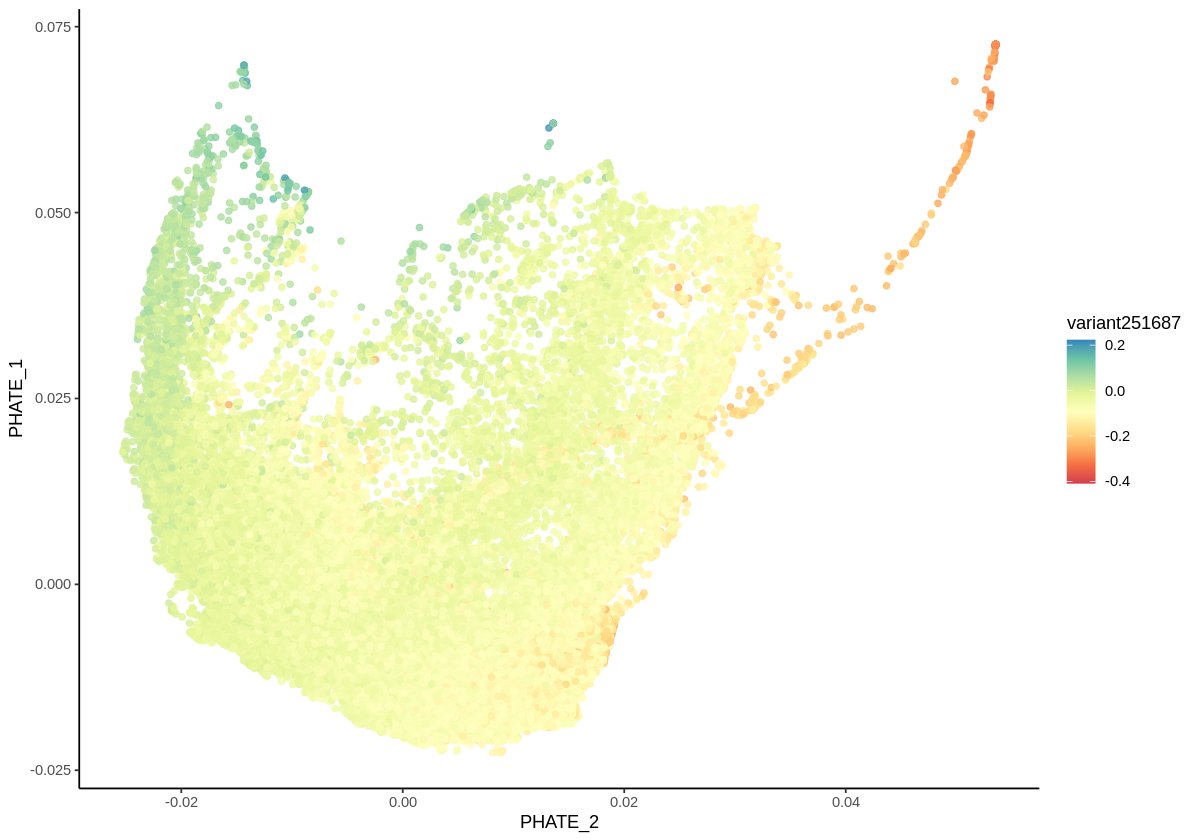

In [125]:
# SELL
p = ggplot(df_to_plot2, aes(x = PHATE_2, y = PHATE_1, colour = variant251687)) + geom_point(alpha=0.8) + theme_classic()
p + scale_colour_gradientn(colors = brewer.pal(9,"Spectral"))

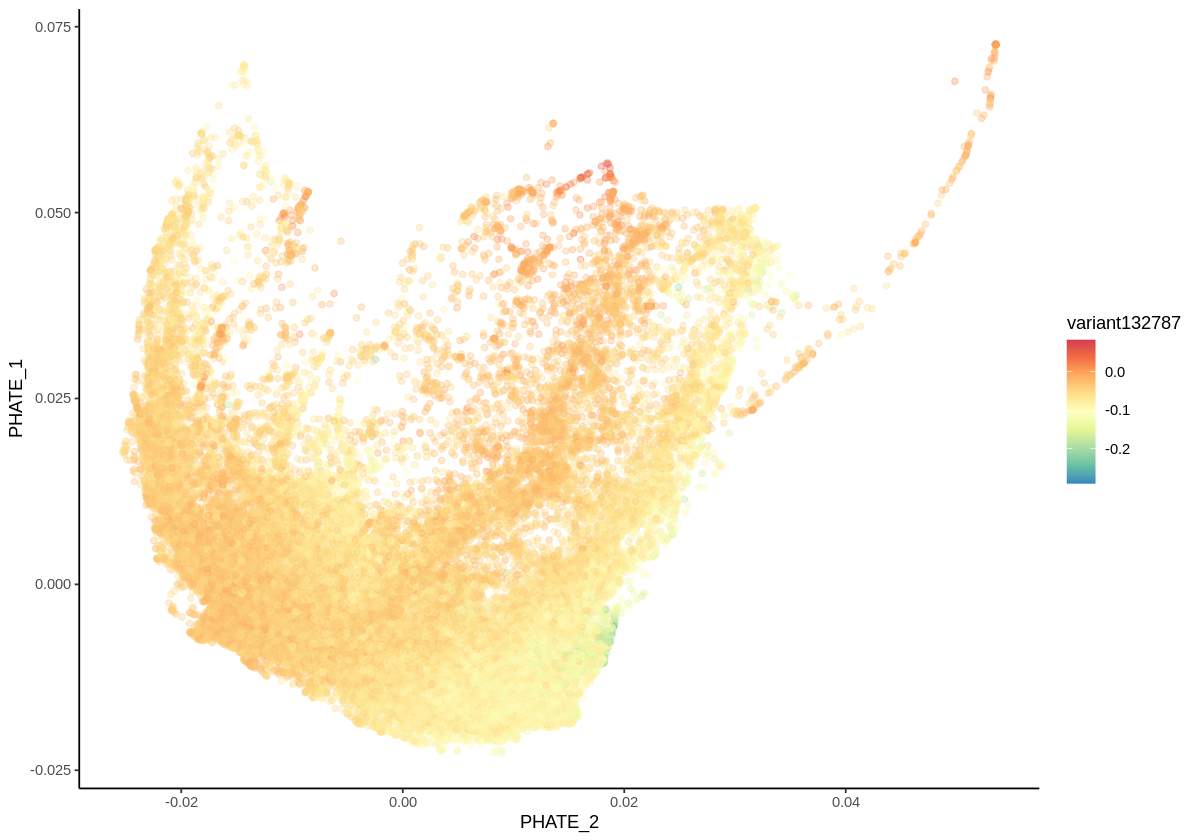

In [120]:
# REL
p = ggplot(df_to_plot2, aes(x = PHATE_2, y = PHATE_1, colour = variant132787)) + geom_point(alpha=0.3) + theme_classic()
p + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))

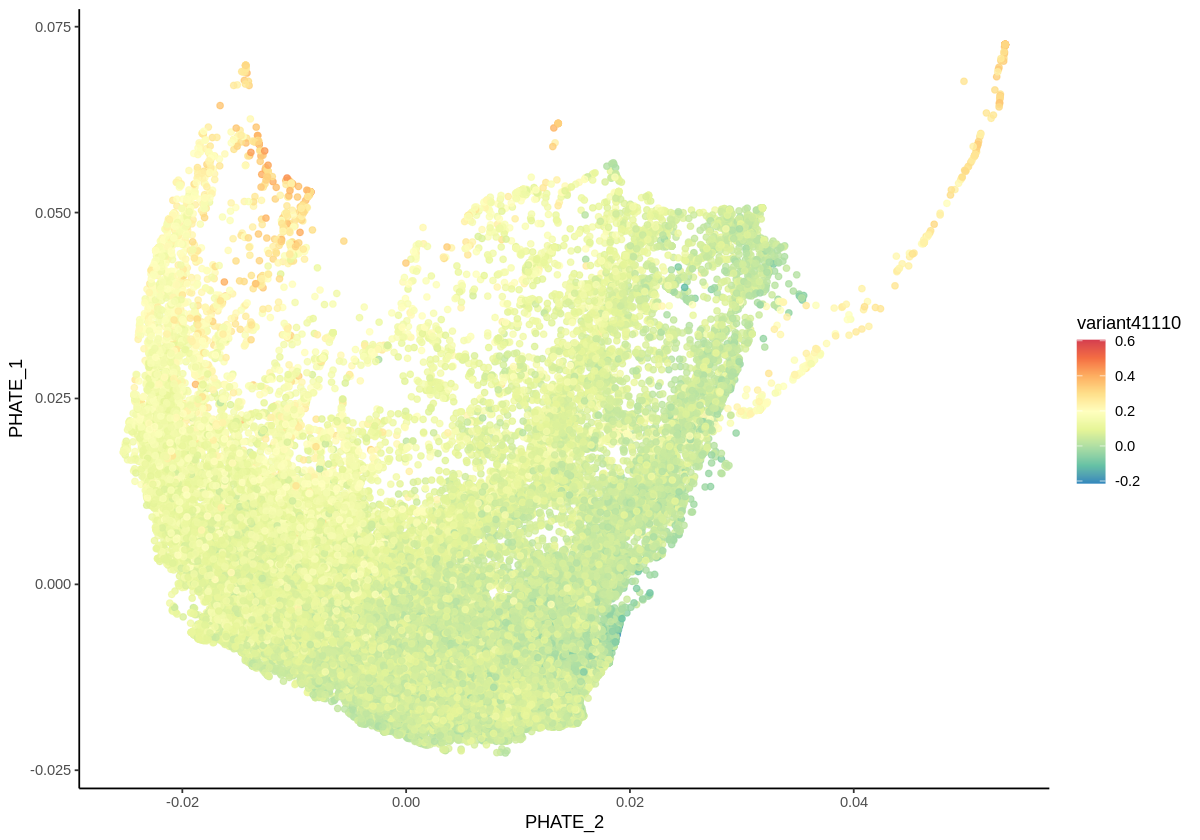

In [116]:
# BLK
p = ggplot(df_to_plot2, aes(x = PHATE_2, y = PHATE_1, colour = variant41110)) + geom_point(alpha=0.8) + theme_classic()
p + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))

In [ ]:
## no plasma

In [42]:
file1 = "/share/ScratchGeneral/anncuo/OneK1K/CRM_interaction/Bcells_noplasma_Bcell_eQTLs/betas/"
df1 = read.csv(file1, row.names=1)
df1$cell = rownames(df1)
head(df1,2)

X11.57283988 cell              
AAACCTGCAACGATCT-1 0.06037347   AAACCTGCAACGATCT-1
AAACCTGGTCAGAATA-1 0.06961878   AAACCTGGTCAGAATA-1

In [43]:
df_to_plot$cell = rownames(df_to_plot)
df_to_plot2 = inner_join(df_to_plot, df1)

Joining, by = "cell"


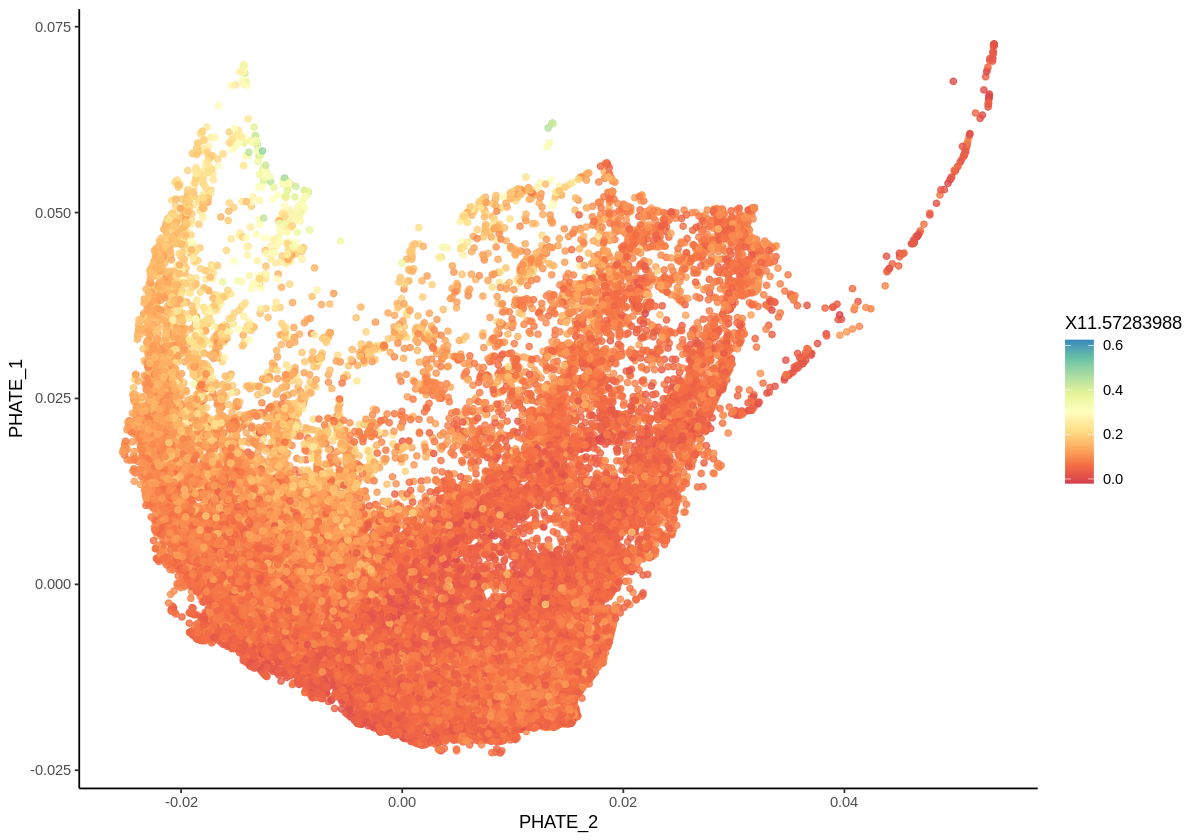

In [44]:
# TIMM10
p = ggplot(df_to_plot2, aes(x = PHATE_2, y = PHATE_1, colour = X11.57283988)) + geom_point(alpha=0.8) + theme_classic()
p + scale_colour_gradientn(colors = brewer.pal(9,"Spectral"))

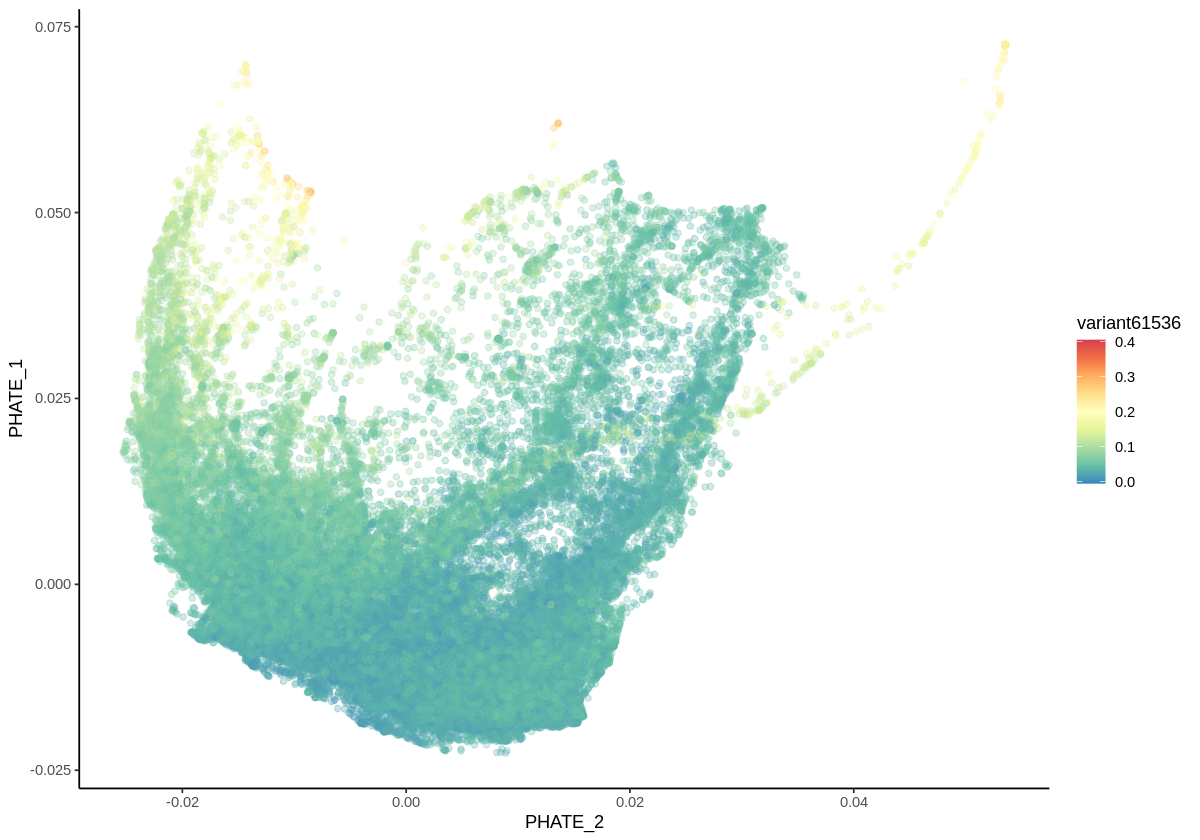

In [110]:
# ORMDL3, 17:38049589
p = ggplot(df_to_plot2, aes(x = PHATE_2, y = PHATE_1, colour = variant61536)) + geom_point(alpha=0.3) + theme_classic()
p + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))

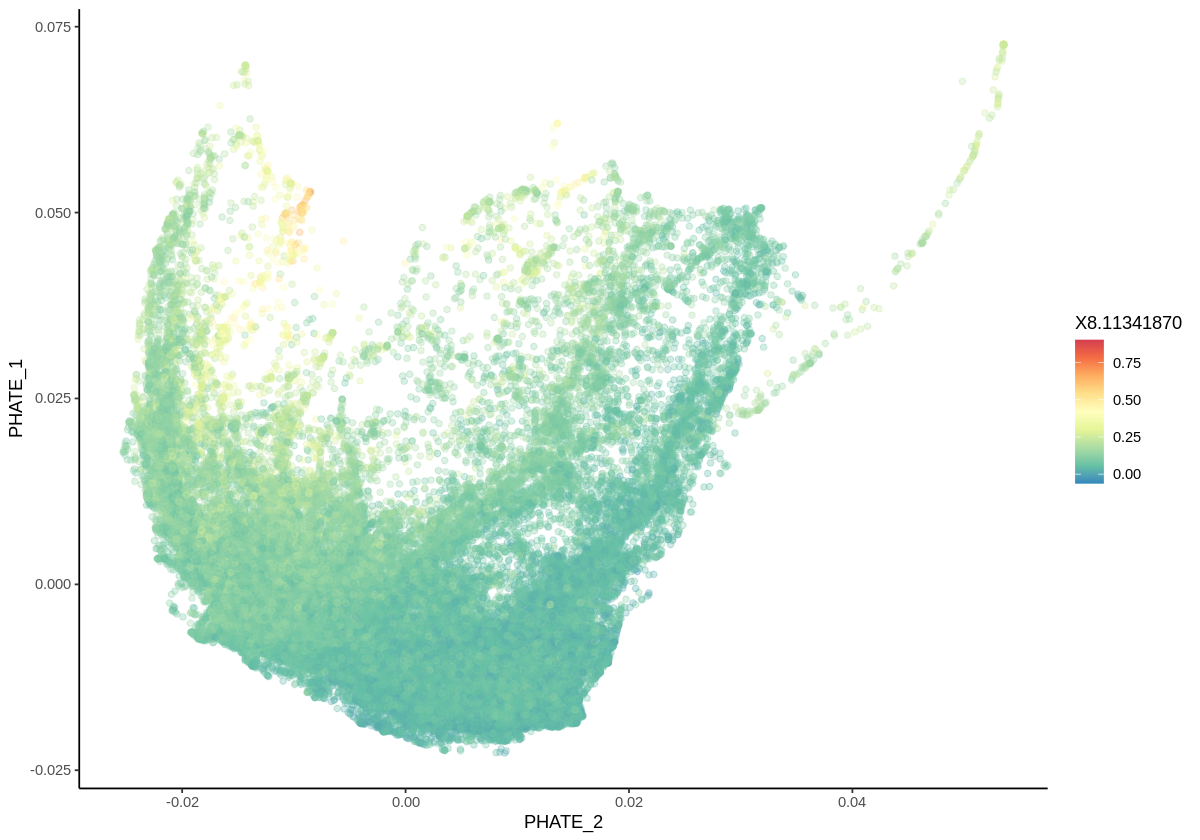

In [104]:
# BLK, 8:11341870
p = ggplot(df_to_plot2, aes(x = PHATE_2, y = PHATE_1, colour = X8.11341870)) + geom_point(alpha=0.3) + theme_classic()
p + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))

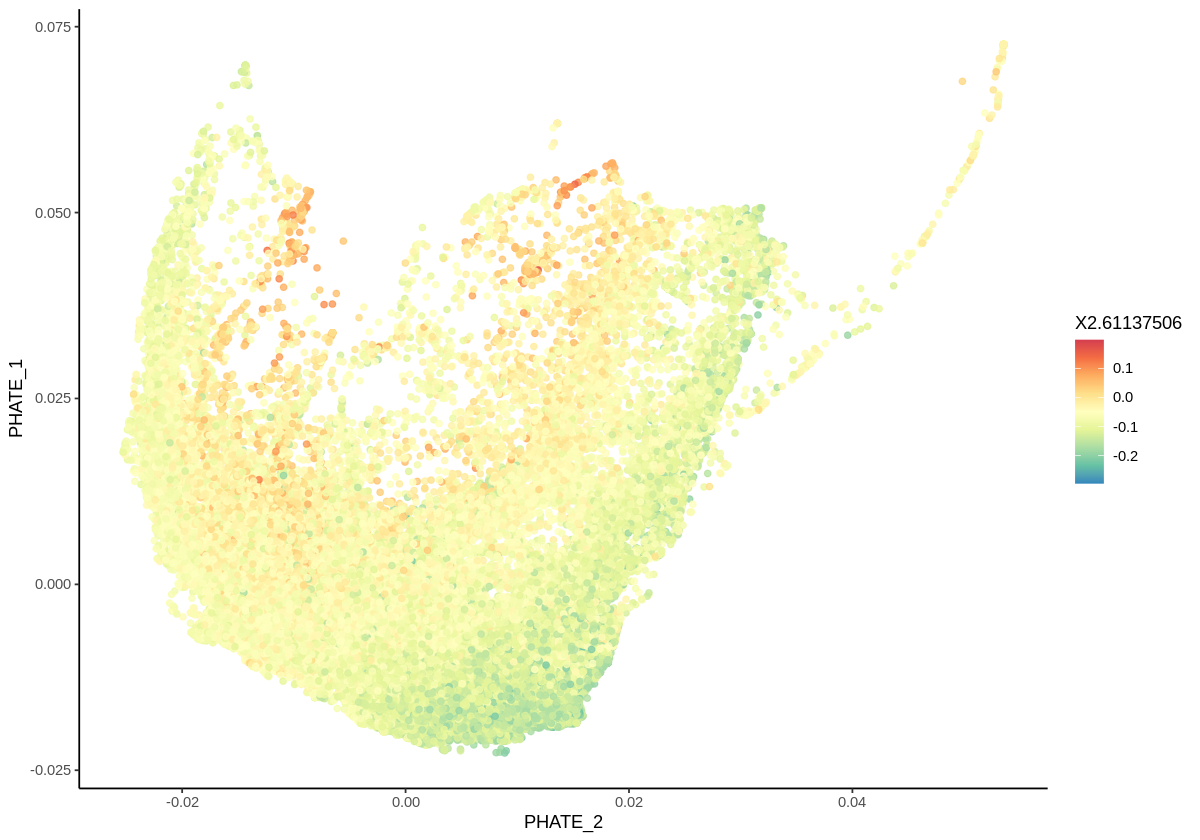

In [95]:
# REL, 2:61137506
p = ggplot(df_to_plot2, aes(x = PHATE_2, y = PHATE_1, colour = X2.61137506)) + geom_point(alpha=0.8) + theme_classic()
p + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))

In [16]:
myfile = "/share/ScratchGeneral/anncuo/OneK1K/CRM_interaction/Bcells_Bcell_eQTLs/summary.csv"
df = read.csv(myfile, row.names=1)
nrow(df)

[1] 128

In [7]:
df[df$gene == "ORMDL3",]

gene   n_snps snp_id      pv_raw      pv_Bonf    
84 ORMDL3 2      17:38051348 0.001048378 0.002096756

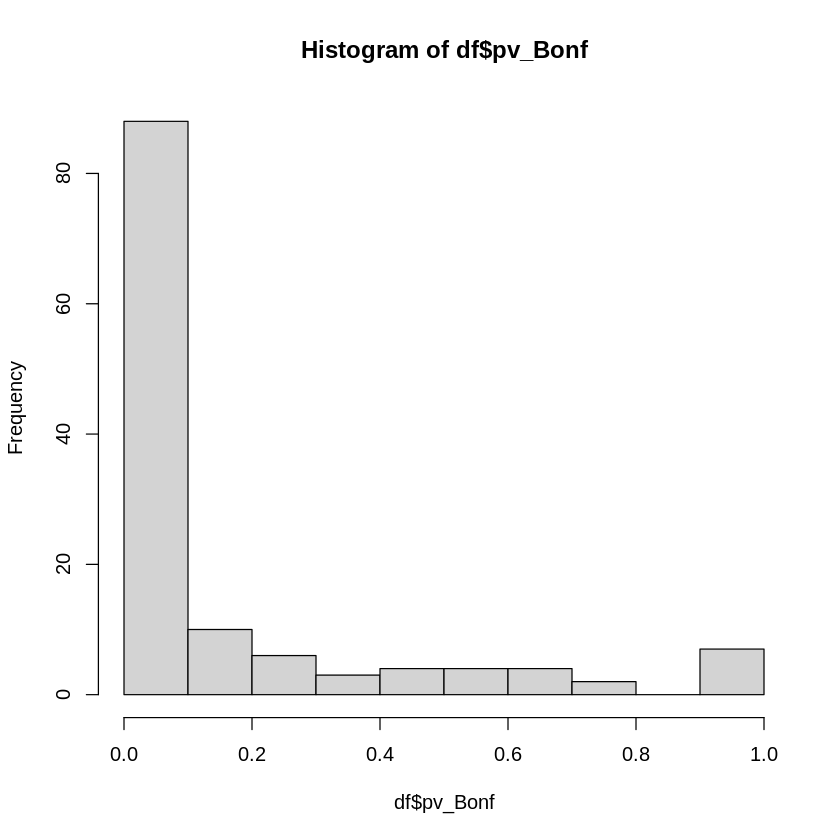

In [8]:
hist(df$pv_Bonf)

In [15]:
df$qv = qvalue(df$pv_Bonf)$qvalues
c(nrow(df),
nrow(df[df$qv<0.05,]),
nrow(df[df$qv<0.05,])/nrow(df))

[1] 128.000000  82.000000   0.640625

In [16]:
file1 = "/share/ScratchGeneral/anncuo/OneK1K/CRM_interaction/Bcells_Bcell_eQTLs/betas"
df1 = read.csv(file1, row.names=1)
head(df1)

variant41110 variant41126
AAACCTGCAACGATCT-1 0.021115043  0.023219635 
AAACCTGGTCAGAATA-1 0.080556878  0.080448780 
AAACGGGAGCGTCAAG-1 0.065475480  0.063266059 
AAACGGGAGGGAACGG-1 0.069929322  0.066462860 
AAACGGGCAGTTCATG-1 0.041660689  0.042561457 
AAACGGGGTCCCTACT-1 0.008420944  0.009986836

In [17]:
file1 = "/share/ScratchGeneral/anncuo/OneK1K/CRM_interaction/Bcells_noplasma_Bcell_eQTLs/betas/"
df1 = read.csv(file1, row.names=1)
head(df1)

chrom betaG       variant   
0 2     -0.01841274 2:61137506

In [23]:
file1 = "/share/ScratchGeneral/anncuo/OneK1K/CRM_interaction/Bcells_noplasma_Bcell_eQTLs/betas/"
df1 = read.csv(file1, row.names=1)
colnames(df1) = gsub("\\.","\\:",gsub("X","",colnames(df1)))
head(df1)

2:61137506 
AAACCTGCAACGATCT-1 -0.15884547
AAACCTGGTCAGAATA-1 -0.01212293
AAACGGGAGCGTCAAG-1 -0.03516532
AAACGGGAGGGAACGG-1 -0.04394153
AAACGGGCAGTTCATG-1 -0.13829936
AAACGGGGTCCCTACT-1 -0.11171419

In [38]:
# Seurat object
mydir = "/share/ScratchGeneral/anncuo/OneK1K/"
# sce_filename = paste0(mydir,"cell_type.RDS")

In [2]:
sce = readRDS(sce_filename)
sce

Loading required package: Seurat

Attaching SeuratObject



An object of class Seurat 
57641 features across 1272489 samples within 2 assays 
Active assay: SCT (24903 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [3]:
## Metadata
metadata_filename =  paste0(mydir,"/metadata.RDS")
df = readRDS(metadata_filename)

In [4]:
### B cells
B_cell_types = unique(as.character(df$cell_type))[grep("B cell", unique(as.character(df$cell_type)))]
B_cell_types

[1] "TCL1A+ FCER2+ B cell" "TCL1A- FCER2- B cell" "IgJ+ B cell"

In [5]:
B_cells_no_plasma = B_cell_types[grep("TCL1A", B_cell_types)]
B_cells_no_plasma

[1] "TCL1A+ FCER2+ B cell" "TCL1A- FCER2- B cell"

In [6]:
df_B_np = df[df$cell_type %in% B_cells_no_plasma,]
nrow(df_B_np)
head(df_B_np,2)

[1] 130091

orig.ident nCount_RNA nFeature_RNA pool   individual
AAACCTGCAACGATCT-1 onek1k     3847        884         pool_1 686_687   
AAACCTGGTCAGAATA-1 onek1k     4028       1097         pool_1 692_693   
                   percent.mt latent nCount_SCT nFeature_SCT
AAACCTGCAACGATCT-1 3.717182   b1     3756        883        
AAACCTGGTCAGAATA-1 3.202582   b1     3811       1095        
                   cell_type            predicted.celltype.l1.score
AAACCTGCAACGATCT-1 TCL1A+ FCER2+ B cell 1                          
AAACCTGGTCAGAATA-1 TCL1A- FCER2- B cell 1                          
                   predicted.celltype.l1 predicted.celltype.l2.score
AAACCTGCAACGATCT-1 B                     0.8730781                  
AAACCTGGTCAGAATA-1 B                     0.9379463                  
                   predicted.celltype.l2
AAACCTGCAACGATCT-1 B naive              
AAACCTGGTCAGAATA-1 B intermediate

In [7]:
B_cells = colnames(sce)[colnames(sce) %in% rownames(df_B_np)]
length(B_cells)
head(B_cells)

[1] 130091

[1] "AAACCTGCAACGATCT-1" "AAACCTGGTCAGAATA-1" "AAACGGGAGCGTCAAG-1"
[4] "AAACGGGAGGGAACGG-1" "AAACGGGCAGTTCATG-1" "AAACGGGGTCCCTACT-1"

In [8]:
sce_B = sce[,colnames(sce) %in% B_cells]
sce_B

An object of class Seurat 
57641 features across 130091 samples within 2 assays 
Active assay: SCT (24903 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [9]:
##### PCA

In [14]:
sce_B = RunPCA(sce_B)

PC_ 1 
Positive:  GNLY, S100A9, S100A8, NKG7, LYZ, CCL5, S100A4, TYROBP, B2M, KLRB1 
	   IL32, CST3, TMSB4X, GZMB, CST7, GZMA, FGFBP2, GZMH, FCER1G, S100A6 
	   HCST, CTSW, CMC1, SRGN, CCL4, CD7, CD3D, ACTB, PRF1, ID2 
Negative:  CD74, HLA-DRA, CD79A, IGLL5, HLA-DPB1, HLA-DRB1, HLA-DPA1, MS4A1, CD79B, HLA-DQB1 
	   TCL1A, HLA-DQA1, LINC00926, HLA-DRB5, MEF2C, VPREB3, FCER2, BANK1, CD37, RP5-887A10.1 
	   AL928768.3, HLA-DMB, HLA-DMA, CD22, HLA-DQA2, BLK, MARCH1, AC079767.4, ADAM28, ARHGAP24 
PC_ 2 
Positive:  IGLL5, AL928768.3, IGJ, S100A9, GNLY, S100A8, LYZ, NKG7, CCL5, B2M 
	   S100A4, TYROBP, RP5-887A10.1, APOD, S100A6, LGALS1, CST3, KLRB1, ACTB, TMSB4X 
	   S100A10, GZMB, ACTG1, CRIP1, CST7, FCER1G, GAPDH, FGFBP2, IL32, GZMA 
Negative:  CD74, HLA-DRA, HLA-DRB1, HLA-DPB1, HLA-DPA1, CD79A, HLA-DQB1, TCL1A, MS4A1, CD79B 
	   MEF2C, FCER2, LINC00926, HLA-DQA1, HLA-DRB5, CD22, VPREB3, CD37, ADAM28, HLA-DMA 
	   MARCH1, MACROD2, HLA-DMB, AC079767.4, HLA-DQA2, BANK1, PHACTR1, RPL18A, TSPA

In [15]:
pca_df = as.data.frame(Embeddings(sce_B, reduction = "pca"))
dim(pca_df)
head(pca_df)

[1] 130091     50

PC_1      PC_2      PC_3       PC_4       PC_5     
AAACCTGCAACGATCT-1 -37.98551 -8.686381  9.0947819  0.8663803  5.103624
AAACCTGGTCAGAATA-1 -22.77593 -4.031883 -8.6517215 -2.8816035  2.052915
AAACGGGAGCGTCAAG-1 -19.19531 -4.261200  0.4867069 -7.5110830 -2.056438
AAACGGGAGGGAACGG-1 -25.24272 38.625514  1.8953909 -7.5533989  2.750394
AAACGGGCAGTTCATG-1 -36.35498 -8.280076  7.3136504 -1.7996415  4.063108
AAACGGGGTCCCTACT-1 -32.68352 -2.490285  8.0703262 -0.4885047  4.271295
                   PC_6      PC_7       PC_8         PC_9      PC_10     ⋯
AAACCTGCAACGATCT-1 10.868219  3.2251869  -0.93214578 -2.513557 -2.778365 ⋯
AAACCTGGTCAGAATA-1 -1.110556 -0.7029045   0.09782488  5.819998 -6.608984 ⋯
AAACGGGAGCGTCAAG-1 -4.980153 -0.7418286  -0.80843026  6.163497  3.844470 ⋯
AAACGGGAGGGAACGG-1 -8.208492 -0.3476790   2.87614662 -8.319364 -2.612886 ⋯
AAACGGGCAGTTCATG-1  6.250331  0.2718679  -0.15916262 -1.555386 -1.850074 ⋯
AAACGGGGTCCCTACT-1 11.397732  0.4248083 -12.59138913  2.176615  2.339691 ⋯
                   PC_41      PC_42      PC_43      PC_44      PC_45     
AAACCTGCAACGATCT-1 -1.2833400 -0.9346849 -1.5595240 -1.9736893 -1.1936258
AAACCTGGTCAGAATA-1  1.6002528  0.1163323 -3.0627312 -1.7462392  4.3300210
AAACGGGAGCGTCAAG-1  0.1279257  0.3049705 -1.1901872 -2.4381299 -0.7733191
AAACGGGAGGGAACGG-1 -1.9940143  0.3874101  3.6338540 -2.4773256  0.4881522
AAACGGGCAGTTCATG-1 -2.3272383 -1.1902761  4.9435476  1.0739534 -2.3940962
AAACGGGGTCCCTACT-1 -0.4317668 -0.3512896 -0.5768831 -0.0919147  0.1637415
                   PC_46      PC_47     PC_48      PC_49      PC_50     
AAACCTGCAACGATCT-1 -0.3442753 -4.379464 -0.2961269  1.3945444  1.0891876
AAACCTGGTCAGAATA-1  1.0979777 -1.913879 -1.8551902  1.6858416 -2.9780184
AAACGGGAGCGTCAAG-1 -0.3245179  1.321271  4.1853534  1.8204304  0.1862208
AAACGGGAGGGAACGG-1 -0.4848437  1.531129 -0.4060404 -2.5161919  1.3083952
AAACGGGCAGTTCATG-1 11.7887530 -4.567436  2.3299461  0.9287978 -4.7502772
AAACGGGGTCCCTACT-1 -0.8389378 -1.120883 -2.0430337 -0.4657971 -1.9232836

In [17]:
df = pca_df[,c("PC_1","PC_2")]
df$cell = rownames(df)
head(df)

PC_1      PC_2      cell              
AAACCTGCAACGATCT-1 -37.98551 -8.686381 AAACCTGCAACGATCT-1
AAACCTGGTCAGAATA-1 -22.77593 -4.031883 AAACCTGGTCAGAATA-1
AAACGGGAGCGTCAAG-1 -19.19531 -4.261200 AAACGGGAGCGTCAAG-1
AAACGGGAGGGAACGG-1 -25.24272 38.625514 AAACGGGAGGGAACGG-1
AAACGGGCAGTTCATG-1 -36.35498 -8.280076 AAACGGGCAGTTCATG-1
AAACGGGGTCCCTACT-1 -32.68352 -2.490285 AAACGGGGTCCCTACT-1

In [18]:
df1$cell = rownames(df1)
head(df1)

variant41110 variant41126 cell              
AAACCTGCAACGATCT-1 0.021115043  0.023219635  AAACCTGCAACGATCT-1
AAACCTGGTCAGAATA-1 0.080556878  0.080448780  AAACCTGGTCAGAATA-1
AAACGGGAGCGTCAAG-1 0.065475480  0.063266059  AAACGGGAGCGTCAAG-1
AAACGGGAGGGAACGG-1 0.069929322  0.066462860  AAACGGGAGGGAACGG-1
AAACGGGCAGTTCATG-1 0.041660689  0.042561457  AAACGGGCAGTTCATG-1
AAACGGGGTCCCTACT-1 0.008420944  0.009986836  AAACGGGGTCCCTACT-1

In [20]:
df2 = inner_join(df,df1)
nrow(df2)
head(df2,2)

Joining, by = "cell"


[1] 130091

PC_1      PC_2      cell               variant41110 variant41126
1 -37.98551 -8.686381 AAACCTGCAACGATCT-1 0.02111504   0.02321963  
2 -22.77593 -4.031883 AAACCTGGTCAGAATA-1 0.08055688   0.08044878

In [28]:
## Metadata
metadata_filename =  paste0(mydir,"/metadata.RDS")
df_meta = readRDS(metadata_filename)
df_meta$cell = rownames(df_meta)
df0 = df_meta[,c("cell","cell_type")]
head(df0,2)

cell               cell_type         
AAACCTGAGAATGTTG-1 AAACCTGAGAATGTTG-1 CD4+ KLRB1+ T cell
AAACCTGAGAGAACAG-1 AAACCTGAGAGAACAG-1 XCL1- NK

In [29]:
df3 = inner_join(df0,df2)

Joining, by = "cell"


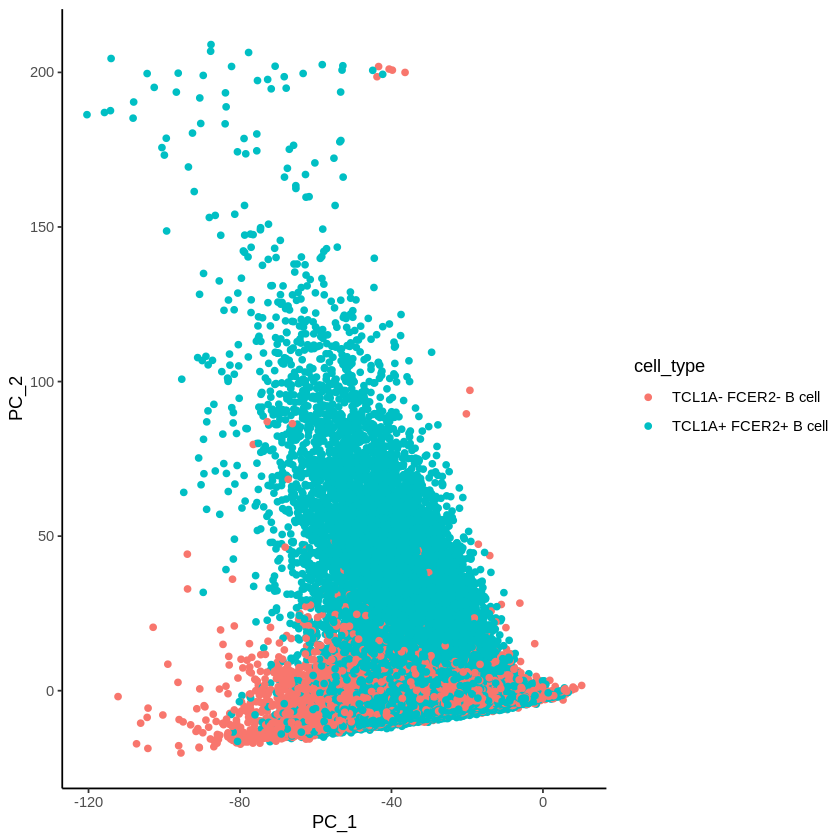

In [30]:
p = ggplot(df3, aes(x=PC_1, y=PC_2, colour=cell_type)) + geom_point() + theme_classic() 
p

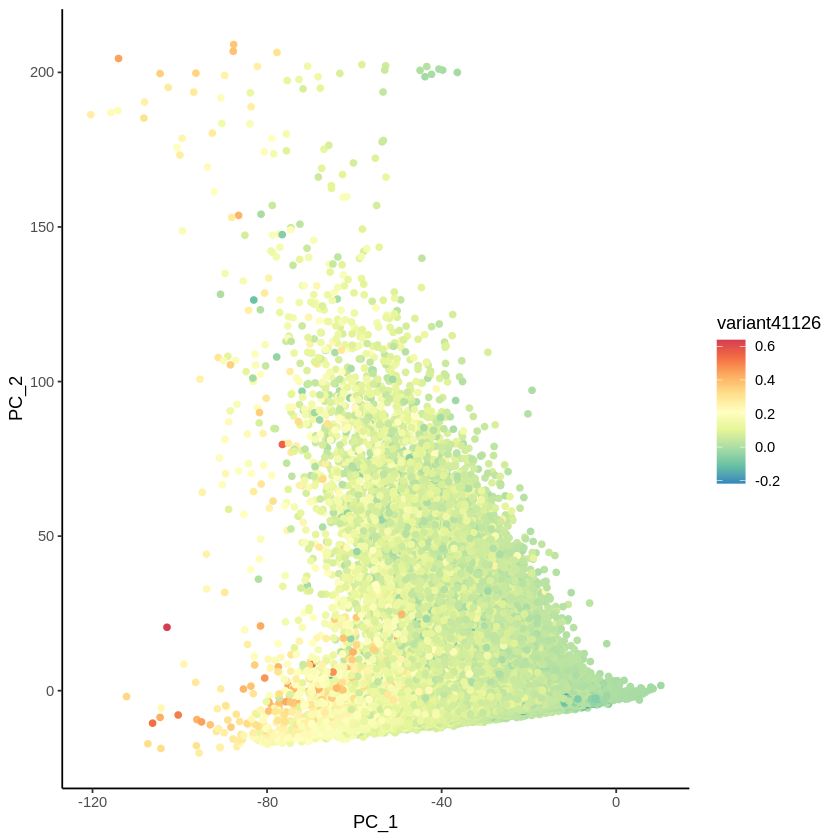

In [26]:
p = ggplot(df3, aes(x=PC_1, y=PC_2, colour=variant41126)) + geom_point() + theme_classic() 
p = p + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
p

In [ ]:
### tSNE

In [ ]:
set.seed(147)
tsne <- Rtsne(t(logcounts(sce)), pca = TRUE)
head(tsne$Y)

In [ ]:
### plot

In [ ]:
pca.set = pca.500hvgs
df = data.frame(PC1 = pca.set$x[,1], PC2 = pca.set$x[,2], day = sce$day)
df = as.data.frame(cbind(df, colData(sce)))
# colnames(df)

In [ ]:
## PCA by day (Fig. 1B, S6)
perc_var <- round(summary(pca.set)$importance[2,]*100, 1)
p = ggplot(df, aes(x = as.numeric(PC1), y = as.numeric(PC2), colour = as.factor(day)))
p = p + geom_point(alpha = 0.2, size = 0.8) #+ ggtitle("PCA, top 500 hvgs")
p = p + scale_color_canva(palette = "Pool party") 
p = p + theme_bw() + theme(legend.position = "none", panel.border = element_blank(), text = element_text(size = 16))
p = p + xlab(paste0("PC1, ",perc_var[1],"% variance explained")) 
p = p + ylab(paste0("PC2, ",perc_var[2],"% variance explained"))
options(repr.plot.width = 6, repr.plot.height = 4)
p

In [ ]:
plot_tsne_day <- function(tsne, sce){
    df = data.frame(comp1 = tsne$Y[,1], comp2 = tsne$Y[,2], day = sce$day)
    p = ggplot(df, aes(x = comp1, y = comp2, colour = as.factor(day)))
    p = p + geom_point(alpha = 0.2, size = 0.8) 
    p = p + scale_color_canva(palette = "Pool party") 
    p = p + theme_bw() + theme(legend.position = "none", panel.border = element_blank())
    p
}

In [ ]:
## tSNE by day (Fig. S6)
options(repr.plot.width = 4, repr.plot.height = 4)
plot_tsne_day(tsne.500hvgs, sce[rowData(sce)$is_intop500hvg,]) + ggtitle("tSNE from top 50 PCS, top 500 hvgs")